In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()

plt.rc("font", family="Malgun Gothic")

In [2]:
train = pd.read_csv('Parking_data/train.csv')
test = pd.read_csv('Parking_data/test.csv')
submission = pd.read_csv('Parking_data/sample_submission.csv')
age_gender = pd.read_csv('Parking_data/age_gender_info.csv')

In [3]:
print('train.shape :' ,train.shape)
train

train.shape : (2952, 15)


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [4]:
print('test.shape:',test.shape)
test

test.shape: (1022, 14)


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [5]:
submission

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0


In [6]:
train.groupby('단지코드').mean()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,
C1000,566.0,45.218571,80.857143,10.0,0.0,1.0,438.0,481.0
C1004,521.0,39.136842,27.421053,3.0,NaN,2.0,153.0,93.0
C1005,1144.0,54.360000,381.333333,16.0,NaN,8.0,950.0,376.0
C1013,1308.0,46.142000,261.600000,16.0,0.0,6.0,1119.0,1665.0
C1014,996.0,49.232857,142.285714,5.0,0.0,2.0,823.0,708.0
...,...,...,...,...,...,...,...,...
C2663,772.0,41.005000,128.666667,14.0,0.0,3.0,700.0,652.0
C2666,1084.0,43.258333,180.666667,23.0,0.0,1.0,837.0,701.0
C2670,648.0,40.918000,129.600000,9.0,0.0,2.0,600.0,435.0


In [7]:
train.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [8]:
# 상가 --> 0 으로 아파트 ---> 1
# 임대보증금 ---> int로 ---> -가 있어서 안된다함  ---> -을 비워주기 ---> 적용시키기
# 임대료 ---> int로 ---> -가 있어서 안된다함  ---> -을 비워주기 ---> 적용시키기
train['임대건물구분'] = train['임대건물구분'].map({'상가':0 , '아파트':1})
test['임대건물구분'] = test['임대건물구분'].map({'상가':0 , '아파트':1})

In [9]:
train[train['임대보증금'] == '-'] = train[train['임대보증금'] == '-'].replace('-','')
test[test['임대보증금'] == '-'] = test[test['임대보증금'] == '-'].replace('-','')

In [10]:
train['임대보증금'] = train['임대보증금'].apply(pd.to_numeric)
test['임대보증금'] = test['임대보증금'].apply(pd.to_numeric)

In [11]:
train[train['임대료'] == '-'] = train[train['임대료'] == '-'].replace('-','' )
test[test['임대료'] == '-'] = test[test['임대료'] == '-'].replace('-','' )

In [12]:
train['임대료'] = train['임대료'].apply(pd.to_numeric)
test['임대료'] = test['임대료'].apply(pd.to_numeric)

In [13]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [14]:
train = train.groupby('단지코드').mean()
test = test.groupby('단지코드').mean()

<AxesSubplot:>

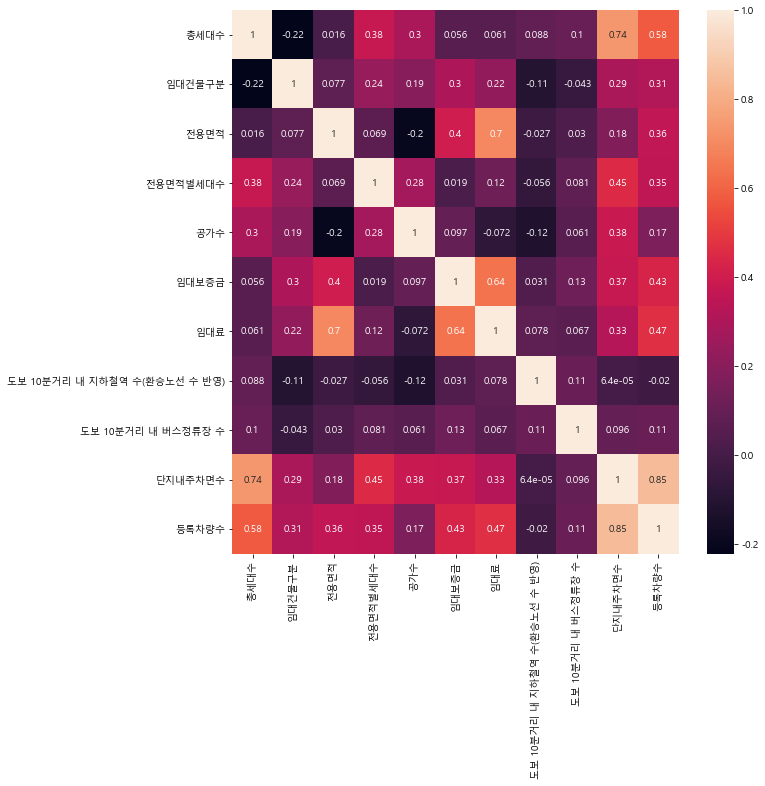

In [15]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True)

In [16]:
#단지내주차수 <---> 총세대수 , 

In [17]:
test.isna().sum()

총세대수                            0
임대건물구분                          0
전용면적                            0
전용면적별세대수                        0
공가수                             0
임대보증금                           1
임대료                             1
도보 10분거리 내 지하철역 수(환승노선 수 반영)    5
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
dtype: int64

<AxesSubplot:xlabel='임대건물구분', ylabel='등록차량수'>

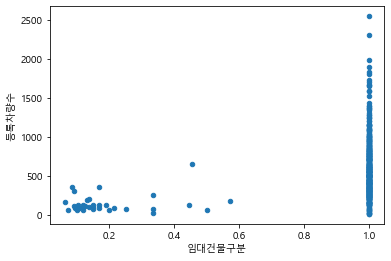

In [18]:
train.plot(x = '임대건물구분', y = '등록차량수', kind = 'scatter')

<AxesSubplot:xlabel='임대료', ylabel='등록차량수'>

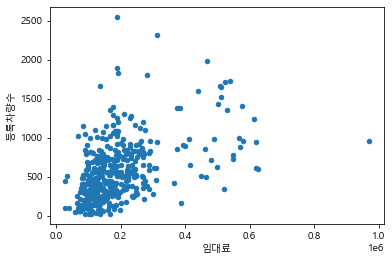

In [19]:
train.plot(x = '임대료', y = '등록차량수', kind = 'scatter')

<AxesSubplot:xlabel='단지내주차면수', ylabel='등록차량수'>

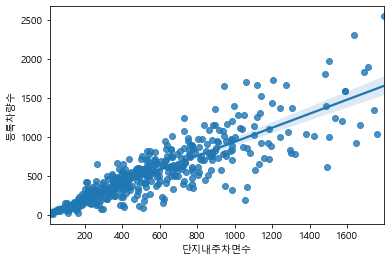

In [22]:
sns.regplot(data = train, x = '단지내주차면수', y = '등록차량수')

In [24]:
#상가 일때는 적음 모델링 따로
#아파트 일때는 다름 모델링 따로

train_0 = train[train['임대건물구분'] < 1]
train_1 = train[train['임대건물구분'] >= 1]

test_0 = test[test['임대건물구분'] < 1]
test_1 = test[test['임대건물구분'] >= 1]

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train_0 = train_0[['단지내주차면수','임대료']]
X_train_1 = train_1['단지내주차면수']

X_test_0 = test_0['단지내주차면수']
X_test_1 = test_1['단지내주차면수']

Y_train_0 = train_0['등록차량수']
Y_train_1 = train_1['등록차량수']

<AxesSubplot:>

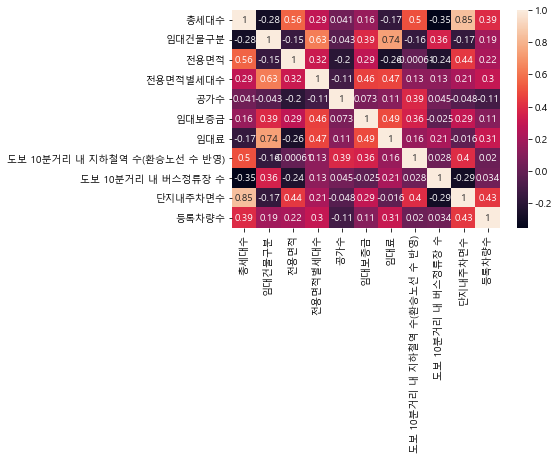

In [26]:
sns.heatmap(train_0.corr(),annot=True)

<AxesSubplot:>

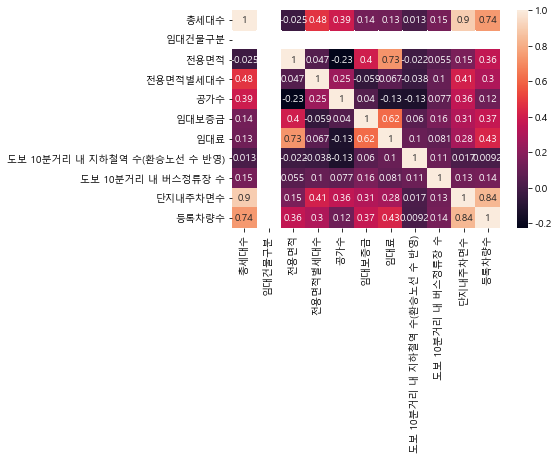

In [27]:
sns.heatmap(train_1.corr(),annot=True)

In [30]:
submission

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_0 = RandomForestRegressor(n_estimators=200, random_state=0)
model_1 = RandomForestRegressor(n_estimators=200, random_state=0)

In [32]:
#상가일때
features = ['총세대수','단지내주차면수']
X_train_0 = train_0[features]
y_train_0 = train_0['등록차량수']
X_test_0 = test_0[features]

In [33]:
model_0.fit(X_train_0,Y_train_0)
model_0.predict(X_test_0)

array([124.355,  86.515, 174.34 , 125.66 , 181.985, 123.48 , 251.475])

In [34]:
#아파트일때
features = ['총세대수','단지내주차면수']
X_train_1 = train_1[features]
y_train_1 = train_1['등록차량수']
X_test_1 = test_1[features]

In [35]:
model_1.fit(X_train_1,Y_train_1)
model_1.predict(X_test_1)

array([ 344.895,  653.84 ,  370.34 ,   21.235,  374.58 ,  471.465,
        476.645,  593.17 ,  436.62 ,  538.22 ,  494.565, 1081.645,
       1259.38 ,  287.57 ,  787.86 ,  637.525, 1025.37 ,  263.925,
        288.755,  296.74 ,  669.78 ,  370.94 ,  156.32 ,  289.395,
        422.755,  765.59 ,  774.84 ,  532.09 ,  476.315,  644.   ,
        422.63 ,  644.665,  377.315,  321.73 ,  190.31 ,  468.79 ,
        102.24 ,  970.69 ,  341.895,  457.205,  632.41 ,  525.86 ,
        833.77 ,  557.45 ,  642.845,  477.78 ,  149.97 ,  689.725,
       1074.945,  616.64 , 1286.69 , 1294.505, 1517.55 ,  310.365,
        983.22 ,  198.79 ,  335.22 ,  504.415,  442.2  , 1154.515,
        392.92 ,  223.5  ,  150.21 ,  162.1  ,  398.11 ,  420.495,
        267.055, 1280.235,  281.745,  713.005,  581.135,  345.165,
        670.96 ,  578.095,  433.04 , 1027.355,  296.72 ,  415.49 ,
        832.035,  954.76 ,  581.815,   61.675,  532.835,  749.31 ,
        800.7  ,  325.435,  560.435,  774.43 , 1213.525,  909.

In [36]:
import numpy as np
test['result'] = np.nan

In [37]:
test

,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,result
단지코드,,,,,,,,,,,
C1003,480.0,1.000000,32.136250,60.000000,29.0,2.265000e+07,115875.000000,0.0,3.0,339.0,NaN
C1006,1505.0,0.259259,60.894074,55.740741,27.0,6.058500e+06,83732.500000,2.0,5.0,428.0,NaN
C1016,643.0,1.000000,48.142500,160.750000,4.0,2.402675e+07,228010.000000,1.0,4.0,646.0,NaN
C1019,321.0,1.000000,44.875000,80.250000,7.0,1.485750e+07,126430.000000,0.0,3.0,259.0,NaN
C1030,75.0,1.000000,26.338333,11.666667,12.0,5.141333e+07,214216.666667,1.0,2.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
C2653,879.0,1.000000,53.810000,219.750000,25.0,2.351175e+07,243055.000000,0.0,16.0,802.0,NaN
C2675,512.0,1.000000,46.938750,64.000000,9.0,3.456550e+07,233448.750000,0.0,3.0,1016.0,NaN
C2676,2572.0,0.065217,53.871957,55.913043,25.0,6.149000e+06,84983.333333,0.0,2.0,418.0,NaN


In [38]:
test.loc[test["임대건물구분"] == 1 , "result"] = model_1.predict(X_test_1)
test.loc[test["임대건물구분"] < 1 , "result"] = model_0.predict(X_test_0)

In [39]:
test

,총세대수,임대건물구분,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,result
단지코드,,,,,,,,,,,
C1003,480.0,1.000000,32.136250,60.000000,29.0,2.265000e+07,115875.000000,0.0,3.0,339.0,344.895
C1006,1505.0,0.259259,60.894074,55.740741,27.0,6.058500e+06,83732.500000,2.0,5.0,428.0,124.355
C1016,643.0,1.000000,48.142500,160.750000,4.0,2.402675e+07,228010.000000,1.0,4.0,646.0,653.840
C1019,321.0,1.000000,44.875000,80.250000,7.0,1.485750e+07,126430.000000,0.0,3.0,259.0,370.340
C1030,75.0,1.000000,26.338333,11.666667,12.0,5.141333e+07,214216.666667,1.0,2.0,29.0,21.235
...,...,...,...,...,...,...,...,...,...,...,...
C2653,879.0,1.000000,53.810000,219.750000,25.0,2.351175e+07,243055.000000,0.0,16.0,802.0,787.045
C2675,512.0,1.000000,46.938750,64.000000,9.0,3.456550e+07,233448.750000,0.0,3.0,1016.0,814.620
C2676,2572.0,0.065217,53.871957,55.913043,25.0,6.149000e+06,84983.333333,0.0,2.0,418.0,251.475


In [47]:
submission = submission.sort_values('code').reset_index(drop = True)

In [56]:
test_result = np.array(test['result'])
test_result

array([ 344.895,  124.355,  653.84 ,  370.34 ,   21.235,  374.58 ,
        471.465,  476.645,  593.17 ,  436.62 ,  538.22 ,  494.565,
       1081.645, 1259.38 ,  287.57 ,  787.86 ,  637.525, 1025.37 ,
        263.925,  288.755,  296.74 ,  669.78 ,  370.94 ,  156.32 ,
        289.395,  422.755,  765.59 ,  774.84 ,  532.09 ,  476.315,
        644.   ,  422.63 ,  644.665,  377.315,  321.73 ,  190.31 ,
        468.79 ,  102.24 ,  970.69 ,  341.895,  457.205,  632.41 ,
        525.86 ,  833.77 ,  557.45 ,  642.845,  477.78 ,  149.97 ,
        689.725, 1074.945,  616.64 , 1286.69 , 1294.505, 1517.55 ,
        310.365,  983.22 ,  198.79 ,  335.22 ,  504.415,  442.2  ,
       1154.515,  392.92 ,  223.5  ,  150.21 ,  162.1  ,  398.11 ,
        420.495,  267.055, 1280.235,  281.745,  713.005,  581.135,
         86.515,  345.165,  670.96 ,  578.095,  433.04 , 1027.355,
        174.34 ,  296.72 ,  415.49 ,  832.035,  954.76 ,  581.815,
         61.675,  532.835,  749.31 ,  800.7  ,  325.435,  560.

In [54]:
submission['num'] = test_result

In [55]:
submission

,code,num
0,C1003,344.895
1,C1006,124.355
2,C1016,653.840
3,C1019,370.340
4,C1030,21.235
...,...,...
145,C2653,787.045
146,C2675,814.620
147,C2676,251.475
148,C2688,123.885


In [57]:
submission.to_csv('RFR_model.csv', index = False)

In [6]:
type(train['단지코드'])

pandas.core.series.Series

In [ ]:
pd.Series(valu)